<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-дат" data-toc-modified-id="Анализ-дат-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ дат</a></span><ul class="toc-item"><li><span><a href="#Количество-чеков" data-toc-modified-id="Количество-чеков-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Количество чеков</a></span></li><li><span><a href="#Сумма-чеков" data-toc-modified-id="Сумма-чеков-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Сумма чеков</a></span></li></ul></li><li><span><a href="#Анализ-источников" data-toc-modified-id="Анализ-источников-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ источников</a></span><ul class="toc-item"><li><span><a href="#Количество-чеков" data-toc-modified-id="Количество-чеков-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Количество чеков</a></span></li></ul></li><li><span><a href="#RFM-анализ" data-toc-modified-id="RFM-анализ-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>RFM анализ</a></span></li></ul></li><li><span><a href="#Когортный-анализ" data-toc-modified-id="Когортный-анализ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Когортный анализ</a></span></li></ul></div>

### Описание проекта

В данном проекте проводится обзор данных и исследоватлеьский анлиз пользователей приложения

Мы рассмотрим период данных, распредление чеков, выбросы по оплатам, rfm анлиз

На основе данных предложим гипотезы для улучшения пользовательского опыта

### Загрузка данных

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/dasha/Downloads/sales.csv', low_memory=False)

In [3]:
df.head()

,day_id,check_time_dtm,check_qnty_id,single_show_name,user_id,sales,sales_wo_vat,cp_sum
0,2017-05-09,2017-05-09 21:22:37,123393511120905255,Приложение,28355,412,374,198
1,2017-05-09,2017-05-09 20:57:06,123717511168611315,Приложение,29091,497,442,197
2,2017-05-09,2017-05-09 16:01:02,129310511160181265,Приложение,16719,150,133,73
3,2017-05-09,2017-05-09 17:12:13,123833511133042365,Приложение,25280,541,483,219
4,2017-05-09,2017-05-09 17:16:20,123833511133043255,Приложение,25280,210,185,94


### Обзор данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108962 entries, 0 to 108961
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   day_id            108962 non-null  object
 1   check_time_dtm    108962 non-null  object
 2   check_qnty_id     108962 non-null  object
 3   single_show_name  108962 non-null  object
 4   user_id           108962 non-null  int64 
 5   sales             108962 non-null  int64 
 6   sales_wo_vat      108962 non-null  int64 
 7   cp_sum            108962 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.7+ MB


В датасете 8 столбцов, в каждом 108962 строки

Типы данных: object, int

Пропусков нет

### Предобработка данных

In [5]:
#Перевод данных в нужные типы
df['day_id'] = pd.to_datetime(df['day_id'], format='%Y-%m-%d')
df['check_time_dtm'] = pd.to_datetime(df['check_time_dtm'], format='%Y-%m-%d %H:%M:%S')
                       

In [6]:
df.head()

,day_id,check_time_dtm,check_qnty_id,single_show_name,user_id,sales,sales_wo_vat,cp_sum
0,2017-05-09,2017-05-09 21:22:37,123393511120905255,Приложение,28355,412,374,198
1,2017-05-09,2017-05-09 20:57:06,123717511168611315,Приложение,29091,497,442,197
2,2017-05-09,2017-05-09 16:01:02,129310511160181265,Приложение,16719,150,133,73
3,2017-05-09,2017-05-09 17:12:13,123833511133042365,Приложение,25280,541,483,219
4,2017-05-09,2017-05-09 17:16:20,123833511133043255,Приложение,25280,210,185,94


In [20]:
#Проверка дубликатов
duplicates = df.duplicated(['check_time_dtm','check_time_dtm', 'single_show_name', 'user_id', 'sales']).sum()

In [23]:
duplicates/(df['check_qnty_id'].count())*100

0.5726767129825077

Дубликатов меньше 1% Можем удалиь их, это не повлияет на анализ

In [24]:
#Удаляем дубликаты
df_raw = df.drop_duplicates(keep='first').reset_index(drop=True)

In [25]:
df_raw.duplicated(['check_time_dtm','check_time_dtm', 'single_show_name', 'user_id', 'sales']).sum()

0

In [26]:
#Ищем не явные дубликаты
df_raw['single_show_name'].unique()

array(['Приложение', 'Киоск'], dtype=object)

Неявных дубликатов нет. Можно приступать к анализу

### Исследовательский анализ

#### Анализ дат

In [29]:
df_raw['check_time_dtm'].min() #начало сбора данных

Timestamp('2017-01-01 14:06:37')

In [30]:
df_raw['check_time_dtm'].max() #окончание сбора данных

Timestamp('2018-12-31 18:58:06')

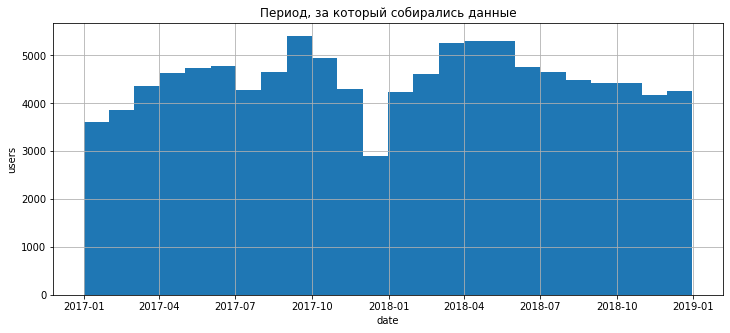

In [33]:
df_raw['day_id'].hist(figsize=(12, 5), bins=24)
plt.title('Период, за который собирались данные')
plt.xlabel('date')
plt.ylabel('users')

plt.show()

В датасете представлен период с 1 января 2017 года по 31 декабря 2018 года

Так же ранее мы посмотрели, что чеки пробиты через мобильное приложение и киоск

In [48]:
#Выделелние временных отвезков
df_raw['year'] = df_raw['day_id'].dt.year
df_raw['month'] = df_raw['day_id'].dt.month
df_raw['weekday'] = df_raw['day_id'].dt.weekday +1

df_raw['hour'] = df_raw['check_time_dtm'].dt.hour

In [103]:
df_raw

,day_id,check_time_dtm,check_qnty_id,single_show_name,user_id,sales,sales_wo_vat,cp_sum,year,month,weekday,hour
0,2017-05-09,2017-05-09 21:22:37,123393511120905255,Приложение,28355,412,374,198,2017,5,2,21
1,2017-05-09,2017-05-09 20:57:06,123717511168611315,Приложение,29091,497,442,197,2017,5,2,20
2,2017-05-09,2017-05-09 16:01:02,129310511160181265,Приложение,16719,150,133,73,2017,5,2,16
3,2017-05-09,2017-05-09 17:12:13,123833511133042365,Приложение,25280,541,483,219,2017,5,2,17
4,2017-05-09,2017-05-09 17:16:20,123833511133043255,Приложение,25280,210,185,94,2017,5,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...
108333,2017-09-27,2017-09-27 16:52:48,122763520405591145,Приложение,4838,229,208,86,2017,9,3,16
108334,2017-09-27,2017-09-27 14:54:44,129217520413806155,Приложение,1265,127,106,19,2017,9,3,14
108335,2017-09-27,2017-09-27 10:26:27,12922252038636565,Приложение,1265,105,95,30,2017,9,3,10
108336,2018-05-04,2018-05-04 10:16:04,139780534765787105,Приложение,141,188,171,65,2018,5,5,10


##### Количество чеков

In [50]:
#Функция для графика по количеству чеков
def payment_hist(column, bins, figsize, part_title, x_label):
    df_raw[column].hist(bins=bins, figsize=figsize)
    plt.title('Распредление чеков по' + part_title, fontsize = 25)
    plt.xlabel(x_label)
    plt.ylabel('Количество чеков')

    return plt.show()

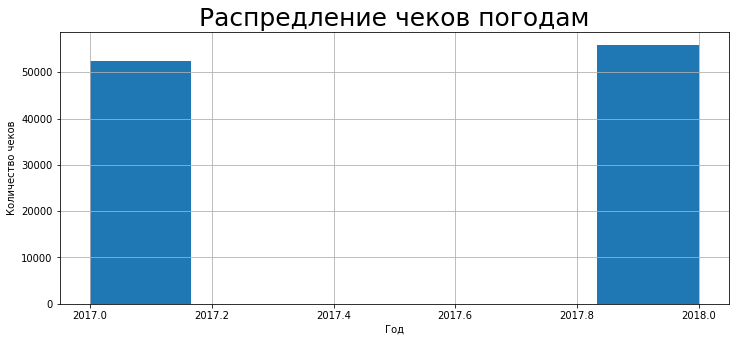

In [54]:
payment_hist('year', 6, (12,5), 'годам', 'Год')

В 2018 году чеков было больше, чем в 2017

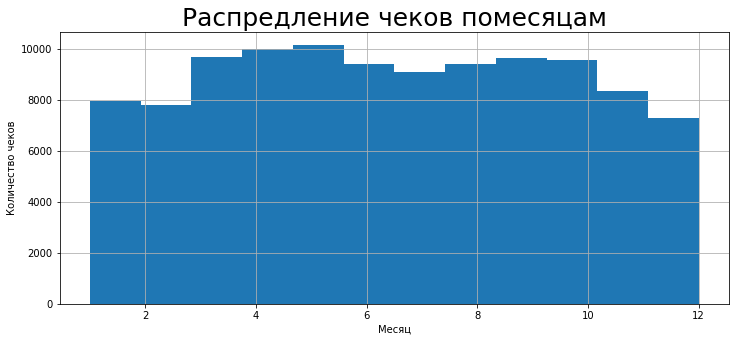

In [55]:
payment_hist('month', 12, (12,5), 'месяцам', 'Месяц')

Больше всего чеков в 5 месяце. Меньше всего в 12. проверим еще разницу в годах

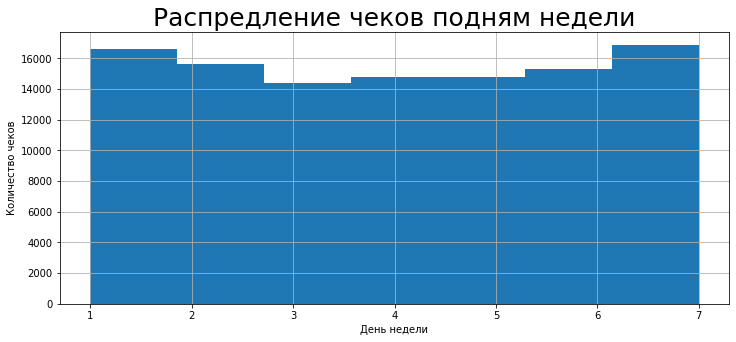

In [53]:
payment_hist('weekday', 7, (12,5), 'дням недели', 'День недели')

Чаще всего покупатели делают заказы в понедельник и воскресенье.

In [65]:
#Функция на график распределения по годам
def payments_hist_2(query, value, value_2, column, bins, part_title, x_label):
    data = df_raw[df_raw[query] == value]
    data_2 = df_raw[df_raw[query] == value_2]
    data[column].hist(bins=bins, figsize=(12,5), alpha=0.5, color='green')
    data_2[column].hist(bins=bins, figsize=(12,5), alpha=0.5, color='orange')
    plt.title('Распредление чеков по' + part_title, fontsize = 25)
    plt.xlabel(x_label)
    plt.ylabel('Количество чеков')
    plt.legend(['2017', '2018'])
    

    return plt.show()

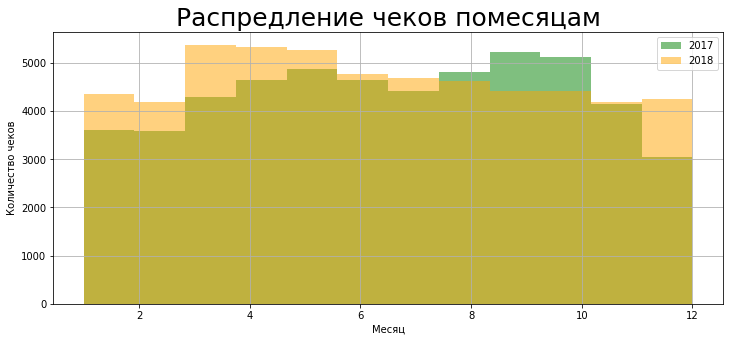

In [66]:
payments_hist_2('year', 2017, 2018, 'month', 12, 'месяцам', 'Месяц')

В 2017 году прирост чеков наблюдается до ноября, далее идет спад

В 2018 году был резкий прирост в январе по сравнению с декабрем 2017 года, а далее спад с середины года 
по количеству чеков

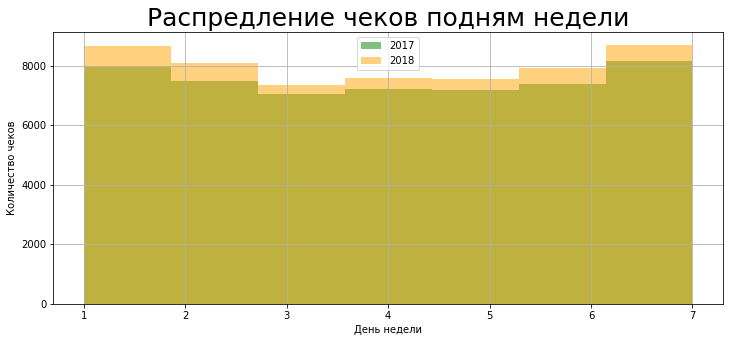

In [67]:
payments_hist_2('year', 2017, 2018, 'weekday', 7, 'дням недели', 'День недели')

В днях недели покупатели совершают покупки схожим поличеством

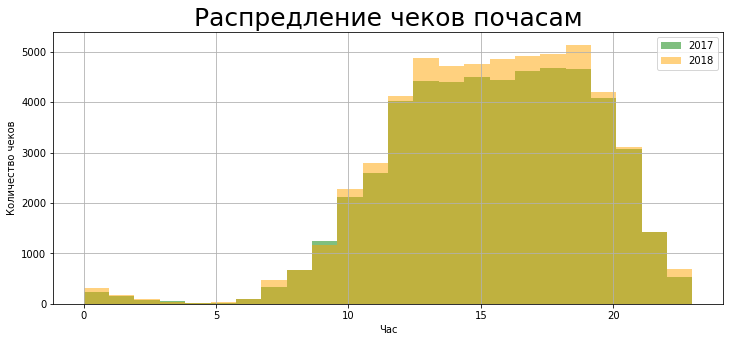

In [104]:
payments_hist_2('year', 2017, 2018, 'hour', 24, 'часам', 'Час')

В часах так же покупатели почти одинаково совершают покупки

##### Сумма чеков

In [97]:
#Функция для ящика с усами с разбивкой по годам
def time_boxplot(x_axis, y_axis, part_title, xlabel): 
    plt.figure(figsize=(15,10))
    sns.boxplot(x=x_axis, y=y_axis, data=df_raw, hue='year')
    plt.title('Распредление суммы чеков по' + part_title, fontsize = 25)
    plt.xlabel(xlabel)
    plt.ylabel('Сумма чеков')
    plt.ylim(0, 3000)

    return plt.show()

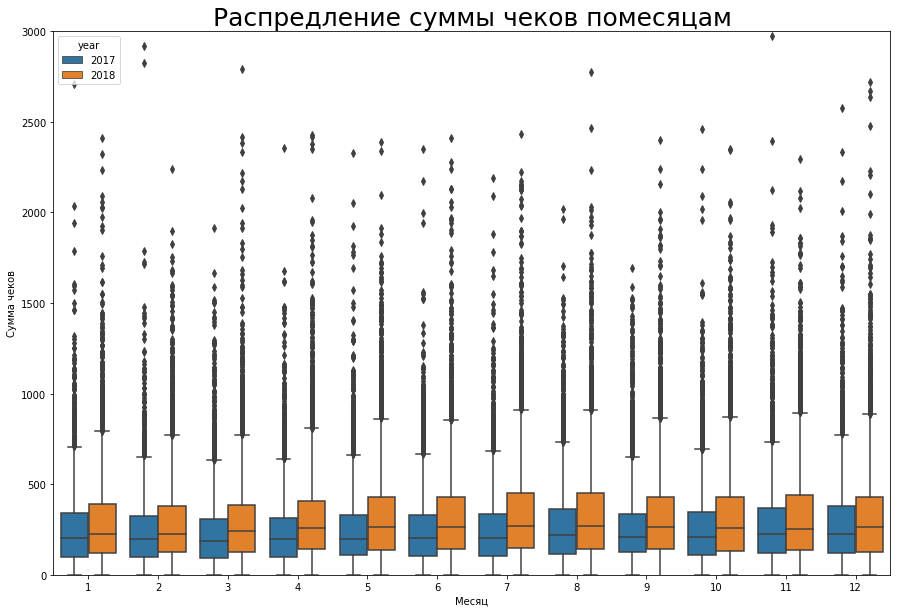

In [102]:
time_boxplot('month', 'sales', 'месяцам', 'Месяц')

В 2018 году разбег по стоимости чека больше чем в 2017 году


In [121]:
#Описание данных
pd.set_option('display.max_columns', None)
(df_raw.query('year == 2017')
       .pivot_table(index='check_qnty_id', columns='month', values='sales').describe()
)

month,1,2,3,4,5,6,7,8,9,10,11,12
count,3602.000000,3593.000000,4297.000000,4655.000000,4879.000000,4649.000000,4417.000000,4804.000000,5223.000000,5135.000000,4157.000000,3043.000000
mean,253.040255,243.913164,233.773098,240.309345,247.786022,247.522478,251.855105,266.175479,258.824239,258.819864,278.056291,287.283273
std,220.796633,221.298382,204.887376,203.229947,213.458839,206.366271,217.708019,222.093570,245.421031,220.653428,243.225729,258.686222
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,97.000000,98.000000,90.000000,97.000000,108.000000,105.000000,105.000000,117.000000,127.000000,112.000000,121.000000,120.000000
50%,202.000000,199.000000,187.000000,195.000000,199.000000,202.000000,204.000000,222.000000,210.000000,206.000000,225.000000,226.000000
75%,341.000000,322.000000,308.000000,315.000000,330.000000,330.000000,337.000000,364.000000,337.000000,345.000000,368.000000,382.000000
max,2706.000000,3613.000000,1913.000000,2355.000000,3825.000000,2351.000000,3397.000000,2017.000000,9187.000000,2461.000000,2972.000000,2577.000000


В 2017 году медианный чек около 205 р, самый высокив декабре - 226р, самый низкий 187 р в марте

Около 25% покупателей совершают покупки выше 330р

In [122]:
pd.set_option('display.max_columns', None)
(df_raw.query('year == 2018')
       .pivot_table(index='check_qnty_id', columns='month', values='sales').describe()
)

month,1,2,3,4,5,6,7,8,9,10,11,12
count,4349.000000,4200.000000,5375.000000,5327.000000,5276.000000,4768.000000,4685.000000,4622.000000,4418.000000,4423.000000,4180.000000,4256.000000
mean,289.576454,286.635238,292.813953,310.015299,320.281179,323.115562,338.257844,334.355041,329.408330,325.236943,324.969617,328.583177
std,262.487146,246.844969,249.880939,257.537242,279.864667,274.494591,286.922606,286.458019,283.658277,284.357964,281.162142,291.630846
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-341.000000,1.000000,0.000000
25%,120.000000,124.000000,127.000000,142.000000,135.000000,142.000000,146.000000,142.000000,142.000000,131.000000,135.000000,127.000000
50%,225.000000,226.000000,240.000000,261.000000,263.000000,266.000000,270.000000,270.000000,262.000000,259.000000,255.000000,262.000000
75%,390.000000,382.000000,386.000000,409.000000,427.000000,427.000000,453.000000,449.000000,431.000000,427.000000,438.000000,431.000000
max,3125.000000,2242.000000,2791.000000,2426.000000,4333.000000,4140.000000,2430.000000,3379.000000,3325.000000,3464.000000,2297.000000,3247.000000


В 2018 году медианный чек около 250 р, самый высокий в июле и августе - 270р, самый низкий 225 р в январе

Около 25% покупателей совершают покупки выше 400р

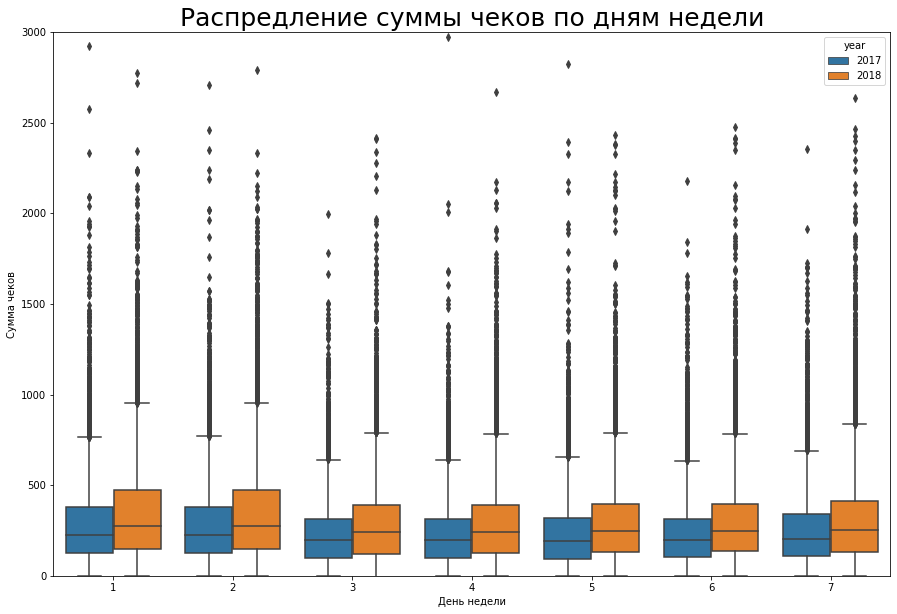

In [111]:
time_boxplot('weekday', 'sales', ' дням недели', 'День недели')

In [113]:
df_raw.pivot_table(index='check_qnty_id', columns=['year','weekday'], values='sales').describe()

year            2017                                                      \
weekday            1            2            3            4            5   
count    7946.000000  7493.000000  7037.000000  7219.000000  7191.000000   
mean      282.677196   280.718938   238.651414   237.458097   241.974552   
std       241.388545   237.415772   201.965171   200.239817   237.761651   
min         1.000000     1.000000     1.000000     1.000000     1.000000   
25%       127.000000   124.000000    97.000000    97.000000    94.000000   
50%       225.000000   225.000000   195.000000   195.000000   191.000000   
75%       382.000000   382.000000   315.000000   315.000000   319.000000   
max      2921.000000  2706.000000  3613.000000  2972.000000  9187.000000   

year                                      2018                            \
weekday            6            7            1            2            3   
count    7392.000000  8176.000000  8649.000000  8107.000000  7356.000000   
mean      242.141504   256.807485   348.147069   352.577032   294.459489   
std       212.420379   219.880610   298.872187   302.520113   254.426558   
min         1.000000     1.000000  -341.000000     1.000000  -217.000000   
25%       102.000000   109.000000   150.000000   150.000000   120.000000   
50%       195.000000   202.000000   276.000000   277.000000   240.000000   
75%       315.000000   342.000000   471.000000   472.000000   388.000000   
max      3825.000000  3037.000000  4333.000000  3882.000000  2415.000000   

year                                                         
weekday            4            5            6            7  
count    7572.000000  7566.000000  7932.000000  8699.000000  
mean      299.438193   299.745903   301.285174   314.892804  
std       255.350874   255.564850   257.048493   277.909746  
min        -1.000000     1.000000     1.000000     1.000000  
25%       127.000000   131.000000   135.000000   130.000000  
50%       244.000000   245.000000   247.000000   251.000000  
75%       390.000000   394.000000   395.000000   412.000000  
max      2668.000000  3379.000000  3262.000000  4140.000000

По дням недели медианный чек изменяется от 225р в начале до 191р в пятницу и растет снова до 202р в 2017 году

В 2018 недели медианный чек изменяется от 276р в начале до 245р в пятницу и растет снова до 251р

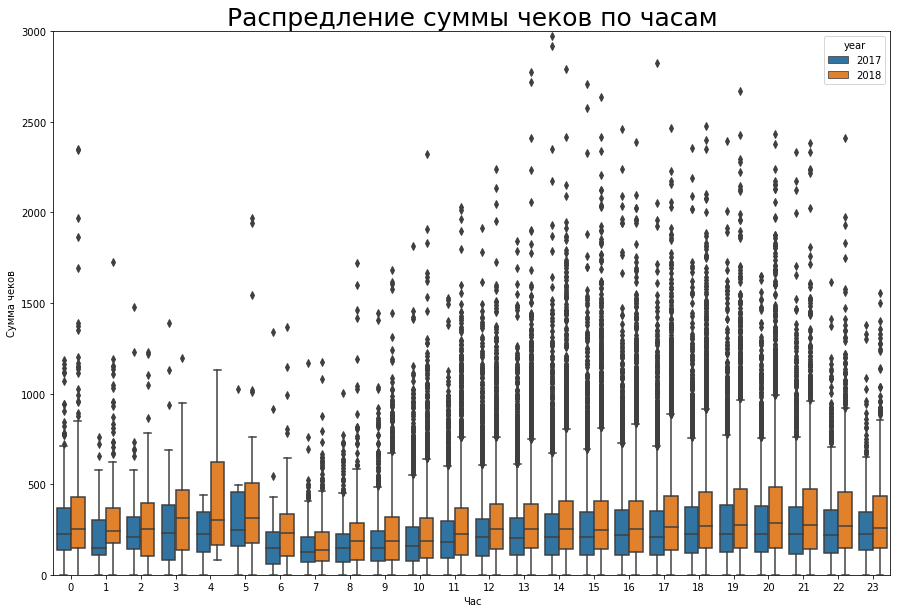

In [114]:
time_boxplot('hour', 'sales', ' часам', 'Час')

По часам самые большие разбеги в суммах оплат

1. медианные чеки выше в вечернее и ночное время, чем в утренее и дневное

2. больше всего выбрсов в дневное время с 13 до 20 - в это время предприятия зарабатывают больше, чем в остальное время

3. в 2018 году явно видно, что к пиковым часам добавляются еще время с 20 до 01

In [118]:
pd.set_option('display.max_columns', None)
(df_raw.query('year == 2017')
       .pivot_table(index='check_qnty_id', columns='hour', values='sales').describe()
)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,242.000000,152.000000,78.000000,47.000000,21.000000,13.000000,95.000000,324.000000,680.000000,1240.000000,2126.000000,2601.000000,4032.000000,4423.000000,4393.000000,4502.000000,4433.000000,4616.000000,4668.000000,4661.000000,4090.000000,3062.000000,1423.000000,532.000000
mean,284.966942,213.473684,268.782051,305.191489,219.380952,318.461538,175.052632,159.191358,161.220588,185.741935,202.845720,224.328335,240.818700,244.576532,255.826997,257.527099,264.877961,261.347487,276.548629,278.311736,277.909046,278.519268,261.886859,258.635338
std,237.249468,159.691837,249.085895,292.021339,143.699853,271.881597,187.877074,132.935494,132.663975,300.365485,186.705021,199.480452,204.442965,207.418399,223.638529,223.939740,230.574327,223.255790,237.850783,230.682267,222.262050,239.271152,209.152023,196.709797
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,135.000000,109.000000,139.750000,82.500000,127.000000,157.000000,60.000000,71.750000,71.000000,75.000000,75.000000,94.000000,105.750000,112.000000,112.000000,109.000000,109.000000,112.000000,120.000000,127.000000,127.000000,116.250000,120.000000,135.000000
50%,225.000000,150.000000,210.000000,229.000000,225.000000,247.000000,150.000000,124.000000,150.000000,150.000000,157.000000,180.000000,210.000000,202.000000,210.000000,208.500000,217.000000,210.000000,225.000000,225.000000,225.000000,225.000000,221.000000,225.000000
75%,367.000000,300.000000,320.500000,386.000000,349.000000,457.000000,238.000000,211.000000,225.000000,240.000000,266.000000,297.000000,307.000000,312.500000,337.000000,344.000000,356.000000,352.000000,375.000000,386.000000,379.000000,375.000000,360.000000,345.250000
max,1185.000000,762.000000,1477.000000,1387.000000,439.000000,1027.000000,1341.000000,1170.000000,1001.000000,9187.000000,1815.000000,3825.000000,3397.000000,3613.000000,2972.000000,2706.000000,2461.000000,2823.000000,3037.000000,2395.000000,1650.000000,2333.000000,1616.000000,1376.000000


In [119]:
pd.set_option('display.max_columns', None)
(df_raw.query('year == 2018')
       .pivot_table(index='check_qnty_id', columns='hour', values='sales').describe()
)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,318.000000,168.000000,86.000000,31.000000,15.000000,36.000000,101.000000,478.000000,671.000000,1158.000000,2270.000000,2784.000000,4126.000000,4865.000000,4721.000000,4757.00000,4846.000000,4917.000000,4957.000000,5134.000000,4209.000000,3114.000000,1430.000000,690.000000
mean,346.018868,325.750000,317.313953,350.838710,412.800000,470.722222,261.920792,179.715481,214.064083,246.930915,247.240308,286.834770,296.510422,304.376876,311.208219,315.84423,316.567272,328.987594,339.992738,350.112778,356.829413,338.755620,340.003497,316.881159
std,347.797359,280.396613,278.120890,266.527434,318.034185,480.717892,230.476059,150.253073,190.419945,234.631855,230.975755,253.643948,237.186234,249.826446,266.155143,286.09306,289.766184,282.307609,283.451078,295.820899,300.594860,274.130605,274.721984,260.742710
min,-217.000000,1.000000,1.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-341.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1043.000000
25%,145.500000,173.250000,103.750000,137.500000,165.000000,174.250000,102.000000,75.000000,79.000000,82.000000,90.000000,112.000000,142.000000,150.000000,142.000000,140.00000,127.000000,135.000000,150.000000,150.000000,150.000000,143.000000,150.000000,149.000000
50%,255.000000,240.000000,255.000000,311.000000,300.000000,311.500000,232.000000,139.000000,188.000000,188.000000,189.000000,225.500000,251.000000,255.000000,255.000000,248.00000,251.000000,262.000000,270.000000,277.000000,285.000000,276.500000,270.000000,260.500000
75%,427.000000,368.500000,397.500000,467.000000,622.500000,506.500000,333.000000,236.000000,286.000000,319.000000,311.000000,371.000000,390.000000,390.000000,409.000000,409.00000,409.000000,435.000000,456.000000,476.000000,487.000000,472.000000,458.750000,435.000000
max,2350.000000,1725.000000,1231.000000,1196.000000,1132.000000,1968.000000,1366.000000,1175.000000,1718.000000,1681.000000,2325.000000,2029.000000,2238.000000,2775.000000,2791.000000,4333.00000,4140.000000,2467.000000,2475.000000,3379.000000,3464.000000,2381.000000,2413.000000,1556.000000


#### Анализ источников

##### Количество чеков

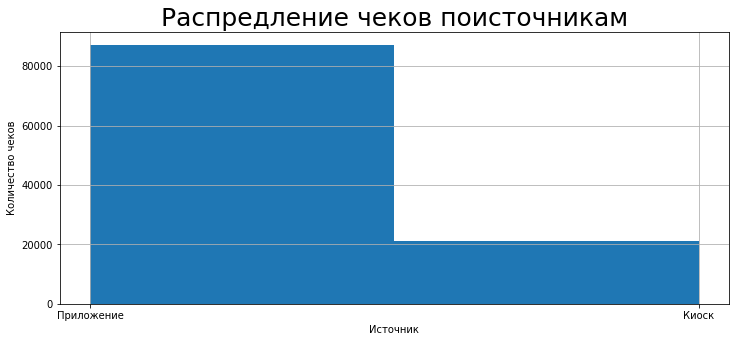

In [124]:
payment_hist('single_show_name', 2, (12,5), 'источникам', 'Источник')

В приложении делают заказов больше, чем в киоске

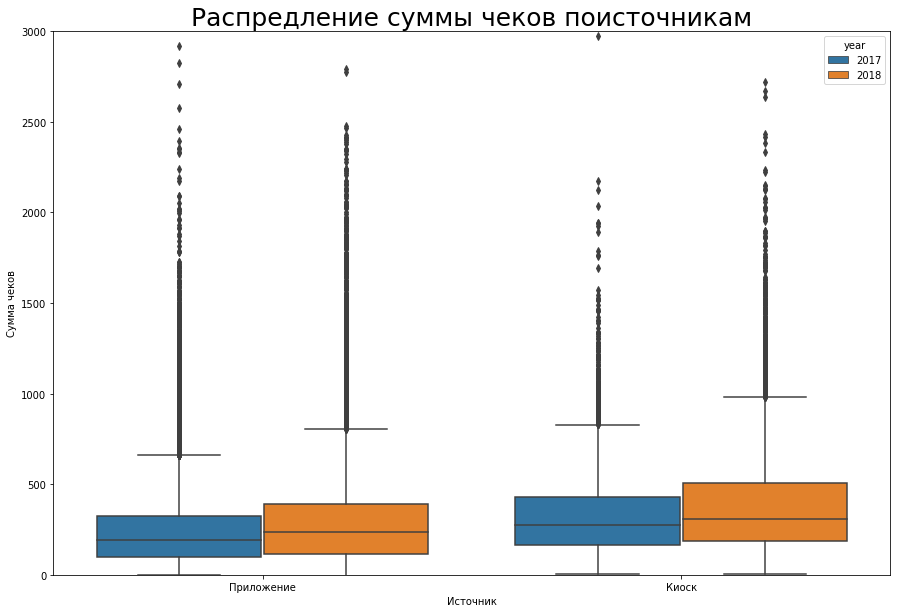

In [125]:
time_boxplot('single_show_name', 'sales', 'источникам', 'Источник')

В киоске медианный чек выше, чем в приложении

In [126]:
df_raw.pivot_table(index='check_qnty_id', columns=['year','single_show_name'], values='sales').describe()

year                     2017                        2018              
single_show_name        Киоск    Приложение         Киоск    Приложение
count             7842.000000  44612.000000  13341.000000  42537.000000
mean               326.688472    242.331570    384.719136    295.442603
std                235.830376    218.555562    289.681566    265.659296
min                  4.000000      1.000000      4.000000      0.000000
25%                165.000000     97.000000    188.000000    113.000000
50%                274.000000    191.000000    307.000000    236.000000
75%                431.000000    322.000000    505.000000    390.000000
max               3613.000000   9187.000000   4140.000000   4333.000000

#### RFM анализ

In [152]:
def rfm(df, n_year):
    df = df[df['year'] == n_year]
    df_pivot = df.pivot_table(index='month', 
                   values=['user_id','check_qnty_id', 'sales'],
                   aggfunc={'user_id': 'nunique','check_qnty_id': 'count', 'sales': 'sum'})
    df_pivot.columns = ['count_checks', 'sales', 'unique_users']
    df_pivot['avg_check'] = round(df_pivot['sales']/df_pivot['count_checks'], 2)
    df_pivot['frequency'] = round(df_pivot['count_checks']/df_pivot['unique_users'], 2)
    
    return df_pivot

In [153]:
df_2017 = rfm(df_raw, 2017)

In [154]:
df_2018 = rfm(df_raw, 2018)

In [162]:
df_2018['inc_checks_vs_2017 %'] = round((df_2018['count_checks']/df_2017['count_checks']-1)*100,2)
df_2018['inc_sales_vs_2017 %'] = round((df_2018['sales']/df_2017['sales']-1)*100, 2)
df_2018['inc_users_vs_2017 %'] = round((df_2018['unique_users']/df_2017['unique_users']-1)*100,2)
df_2018['inc_avg_check_vs_2017 %'] = round((df_2018['avg_check']/df_2017['avg_check']-1)*100,2)
df_2018['inc_frequency_vs_2017 %'] = round((df_2018['frequency']/df_2017['frequency']-1)*100,2)


/var/folders/nn/f_68pchx07b79488p6xxkv440000gn/T/ipykernel_3018/688980441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['inc_checks_vs_2017 %'] = round((df_2018['count_checks']/df_2017['count_checks']-1)*100,2)
/var/folders/nn/f_68pchx07b79488p6xxkv440000gn/T/ipykernel_3018/688980441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['inc_sales_vs_2017 %'] = round((df_2018['sales']/df_2017['sales']-1)*100, 2)
/var/folders/nn/f_68pchx07b79488p6xxkv440000gn/T/ipykernel_3018/688980441.py

In [163]:
df_2018 = df_2018[['unique_users', 'inc_users_vs_2017 %', 
                   'count_checks', 'inc_checks_vs_2017 %', 
                   'sales', 'inc_sales_vs_2017 %', 
                   'avg_check', 'inc_avg_check_vs_2017 %', 
                   'frequency', 'inc_frequency_vs_2017 %']]

In [260]:
df_2018

,unique_users,inc_users_vs_2017 %,count_checks,inc_checks_vs_2017 %,sales,inc_sales_vs_2017 %,avg_check,inc_avg_check_vs_2017 %,frequency,inc_frequency_vs_2017 %
month,,,,,,,,,,
1,1675,28.85,4349,20.74,1259368,38.17,289.58,14.44,2.60,-6.14
2,1588,26.43,4200,16.89,1203868,37.37,286.64,17.52,2.64,-7.69
3,1765,27.71,5375,25.09,1573875,56.68,292.81,25.26,3.05,-1.93
4,1850,27.94,5328,14.46,1651602,47.64,309.99,29.00,2.88,-10.56
5,1899,20.49,5277,8.16,1689954,39.79,320.25,29.24,2.78,-10.32
6,1751,11.32,4768,2.56,1540615,33.88,323.12,30.54,2.72,-8.11
7,1744,14.89,4685,6.07,1584738,42.46,338.26,34.30,2.69,-7.56
8,1745,8.39,4622,-3.79,1545389,20.86,334.36,25.61,2.65,-11.07
9,1649,-2.83,4419,-15.39,1455326,7.66,329.33,27.24,2.68,-12.99


In [268]:
print('В среднем количество уникальных покупателей в 2018 году выше, чем в 2017 на ', 
      round(df_2018['inc_users_vs_2017 %'].mean()), '%')

print('В среднем количество чеков в 2018 году выше, чем в 2017 на ', 
      round(df_2018['inc_checks_vs_2017 %'].mean()), '%')

print('В среднем сумма продаж в 2018 году выше, чем в 2017 на ', 
      round(df_2018['inc_sales_vs_2017 %'].mean()), '%')

print('В среднем средний чек в 2018 году выше, чем в 2017 на ', 
      round(df_2018['inc_avg_check_vs_2017 %'].mean()), '%')

print('В среднем частота в 2018 году ниже, чем в 2017 на ', 
      round(df_2018['inc_frequency_vs_2017 %'].mean()), '%')

В среднем количество уникальных покупателей в 2018 году выше, чем в 2017 на  16 %
В среднем количество чеков в 2018 году выше, чем в 2017 на  8 %
В среднем сумма продаж в 2018 году выше, чем в 2017 на  34 %
В среднем средний чек в 2018 году выше, чем в 2017 на  24 %
В среднем частота в 2018 году ниже, чем в 2017 на  -6 %


Таким образом, покупатели сали тратить больше в 2018 году, но приходить реже. 
Однако частота сократилась на 6%, а продажи выросли на 34% из-за роста среднего чека

Это может быть сязано с увеличением количества точек, ростом акций, ростом маркетинговых мероприятий

In [167]:
df_raw

,day_id,check_time_dtm,check_qnty_id,single_show_name,user_id,sales,sales_wo_vat,cp_sum,year,month,weekday,hour
0,2017-05-09,2017-05-09 21:22:37,123393511120905255,Приложение,28355,412,374,198,2017,5,2,21
1,2017-05-09,2017-05-09 20:57:06,123717511168611315,Приложение,29091,497,442,197,2017,5,2,20
2,2017-05-09,2017-05-09 16:01:02,129310511160181265,Приложение,16719,150,133,73,2017,5,2,16
3,2017-05-09,2017-05-09 17:12:13,123833511133042365,Приложение,25280,541,483,219,2017,5,2,17
4,2017-05-09,2017-05-09 17:16:20,123833511133043255,Приложение,25280,210,185,94,2017,5,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...
108333,2017-09-27,2017-09-27 16:52:48,122763520405591145,Приложение,4838,229,208,86,2017,9,3,16
108334,2017-09-27,2017-09-27 14:54:44,129217520413806155,Приложение,1265,127,106,19,2017,9,3,14
108335,2017-09-27,2017-09-27 10:26:27,12922252038636565,Приложение,1265,105,95,30,2017,9,3,10
108336,2018-05-04,2018-05-04 10:16:04,139780534765787105,Приложение,141,188,171,65,2018,5,5,10


### Когортный анализ

In [203]:
def rr(data, var, agf):
    session_start = data.groupby('user_id').agg({'check_time_dtm': 'min'})
    session_start = session_start.rename(columns= {'check_time_dtm': 'first_month'})
    df_rr = session_start.merge(data, on='user_id', how='right')
    df_rr['lifetime'] = ((df_rr['day_id'].astype('datetime64[M]') - df_rr['first_month'].astype('datetime64[M]'))/pd.Timedelta(days=30)).astype(int)
    df_rr['first_month'] = df_rr['first_month'].dt.strftime('%Y-%m')

    df_grouped = df_rr.pivot_table(index='first_month',
                                columns='lifetime',
                                values=var,
                                aggfunc=agf)
    cohort_size = (df_rr.groupby('first_month')
                   .agg({var: agf})
                   .rename(columns={var: 'cohort_size'})
                   )

    df_grouped = cohort_size.merge(df_grouped, on='first_month', how='left').fillna(0)

    
    return df_grouped

In [208]:
retention_app = rr(df_raw[df_raw['single_show_name'] == 'Приложение'], 'user_id', 'nunique')
retention_app = retention_app.div(retention_app['cohort_size'], axis=0).drop(columns=['cohort_size'])

In [210]:
retention_kiosk = rr(df_raw[df_raw['single_show_name'] == 'Киоск'], 'user_id', 'nunique')
retention_kiosk = retention_kiosk.div(retention_kiosk['cohort_size'], axis=0).drop(columns=['cohort_size'])

In [229]:
retention_app_avg = rr(df_raw[df_raw['single_show_name'] == 'Приложение'], 'sales', 'mean')
retention_app_avg = retention_app_avg.drop(columns=['cohort_size']).round()

In [231]:
retention_kiosk_avg = rr(df_raw[df_raw['single_show_name'] == 'Киоск'], 'sales', 'mean')
retention_kiosk_avg = retention_kiosk_avg.drop(columns=['cohort_size']).round()

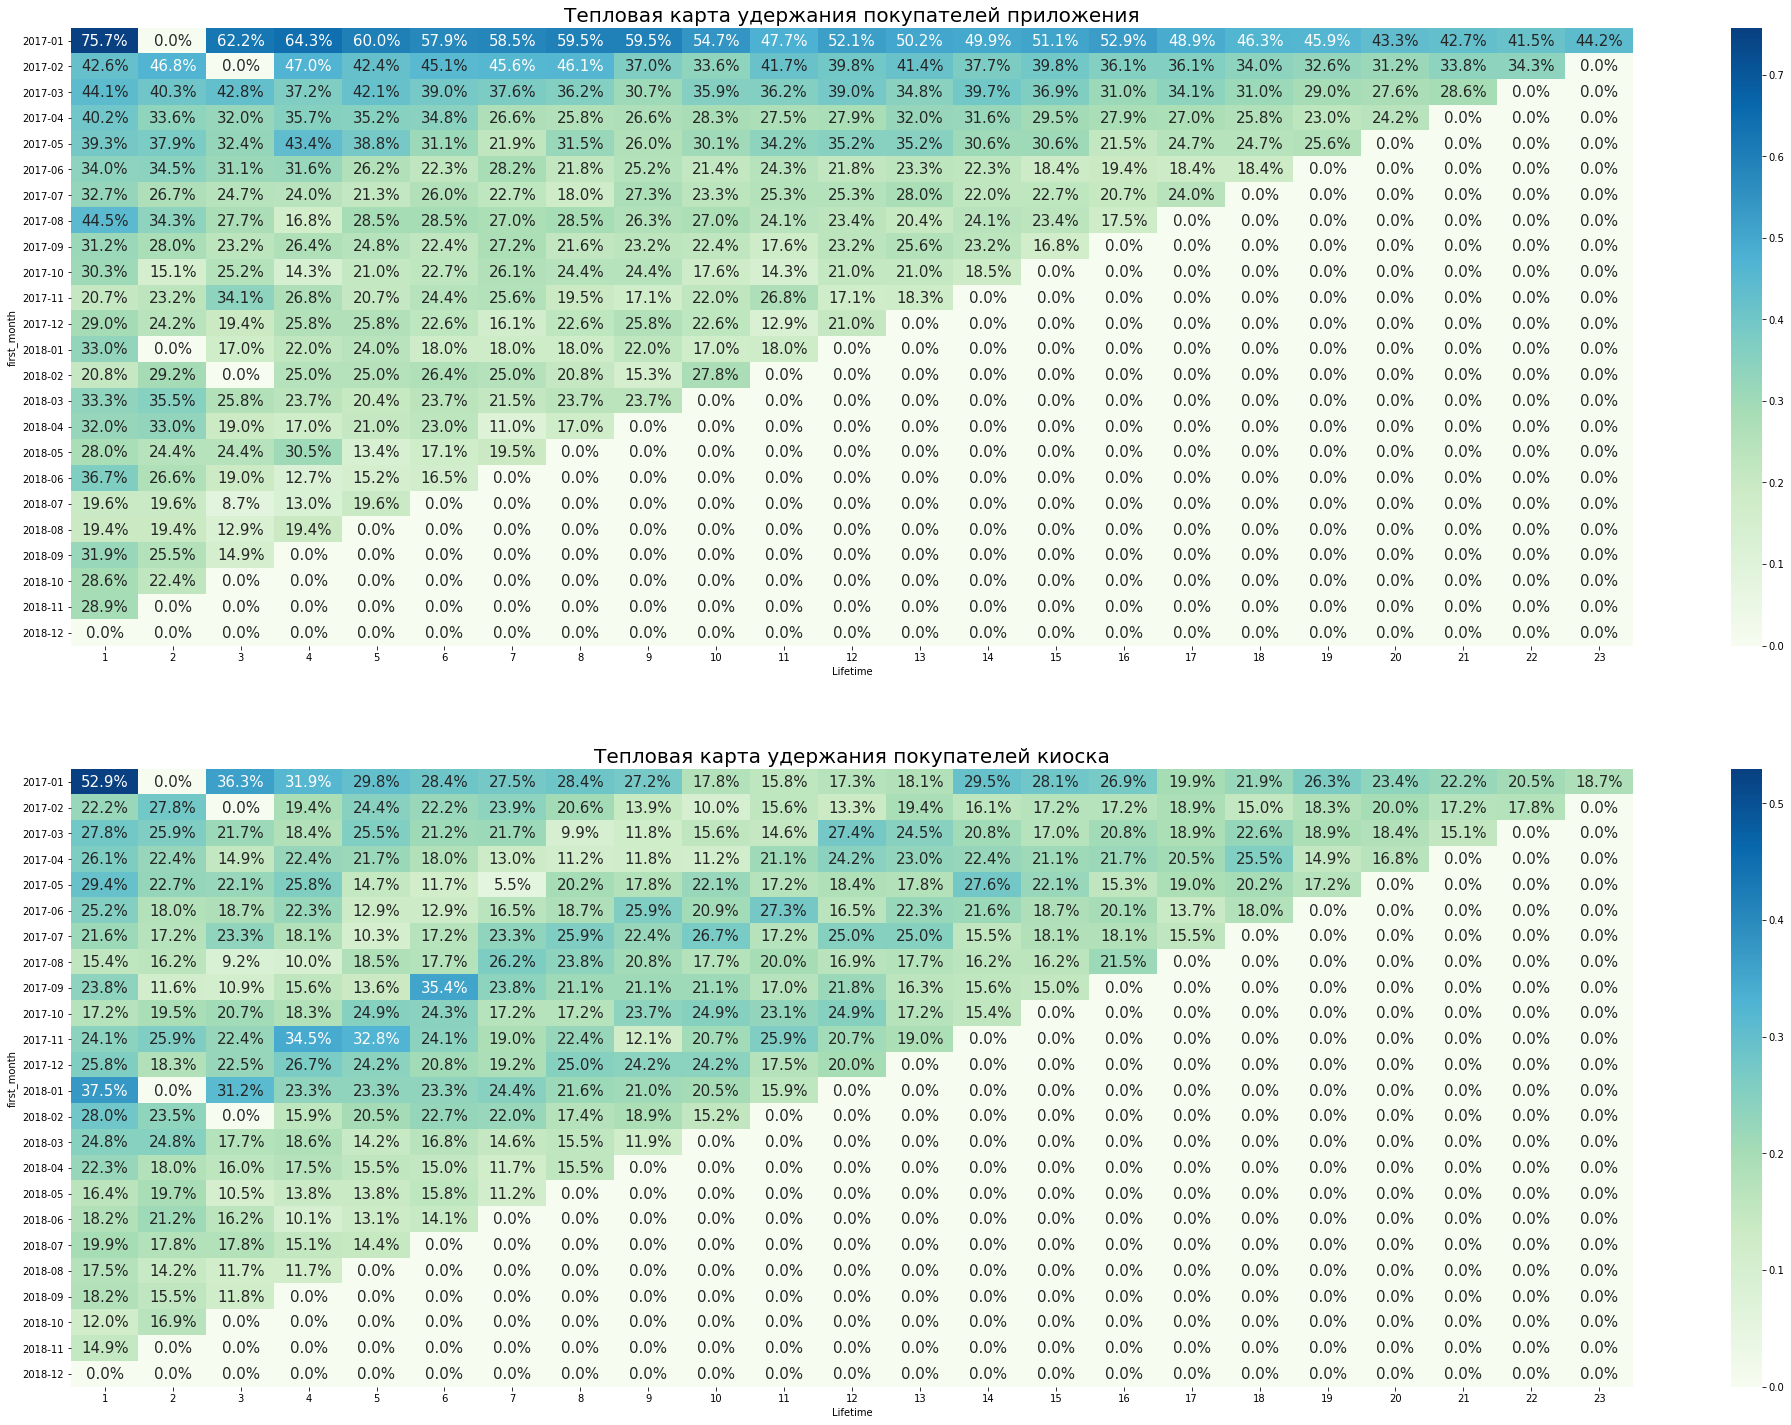

In [270]:
plt.figure(figsize=(35, 25))
plt.subplot(2, 1, 1)
sns.heatmap(retention_app.drop(columns=[0]),annot=True,fmt='.1%', cmap='GnBu', annot_kws={"fontsize": 15})    
plt.title('Тепловая карта удержания покупателей приложения', fontsize=20)
plt.xlabel('Lifetime')

plt.subplot(2, 1, 2)
sns.heatmap(retention_kiosk.drop(columns=[0]),annot=True,fmt='.1%', cmap='GnBu', annot_kws={"fontsize": 15})    
plt.title('Тепловая карта удержания покупателей киоска', fontsize=20)
plt.xlabel('Lifetime')


plt.show()

Удержание 1 месяца после прихода сокращается в обоих итсочниках:
    - у приложения с 75,7% до 28,9% (в середнине года до 19%)
    - у киоска с 52,9% до 14,9% (в середине года до 12%)
    
В целом покупатели киоска уходя более плавно в первый месяц после прихода, чем покупатели приложения. В приложении возмножко проводятся промо для удержания покупателей, 
поэтому в тепловой карте есть скачки доли покупателей

Но в целом по карте видно, что покупатели через киоск в течение года подвержены так е влиятнию промо или других внешних факторов, даже сильнее чем пользовтаели приложения




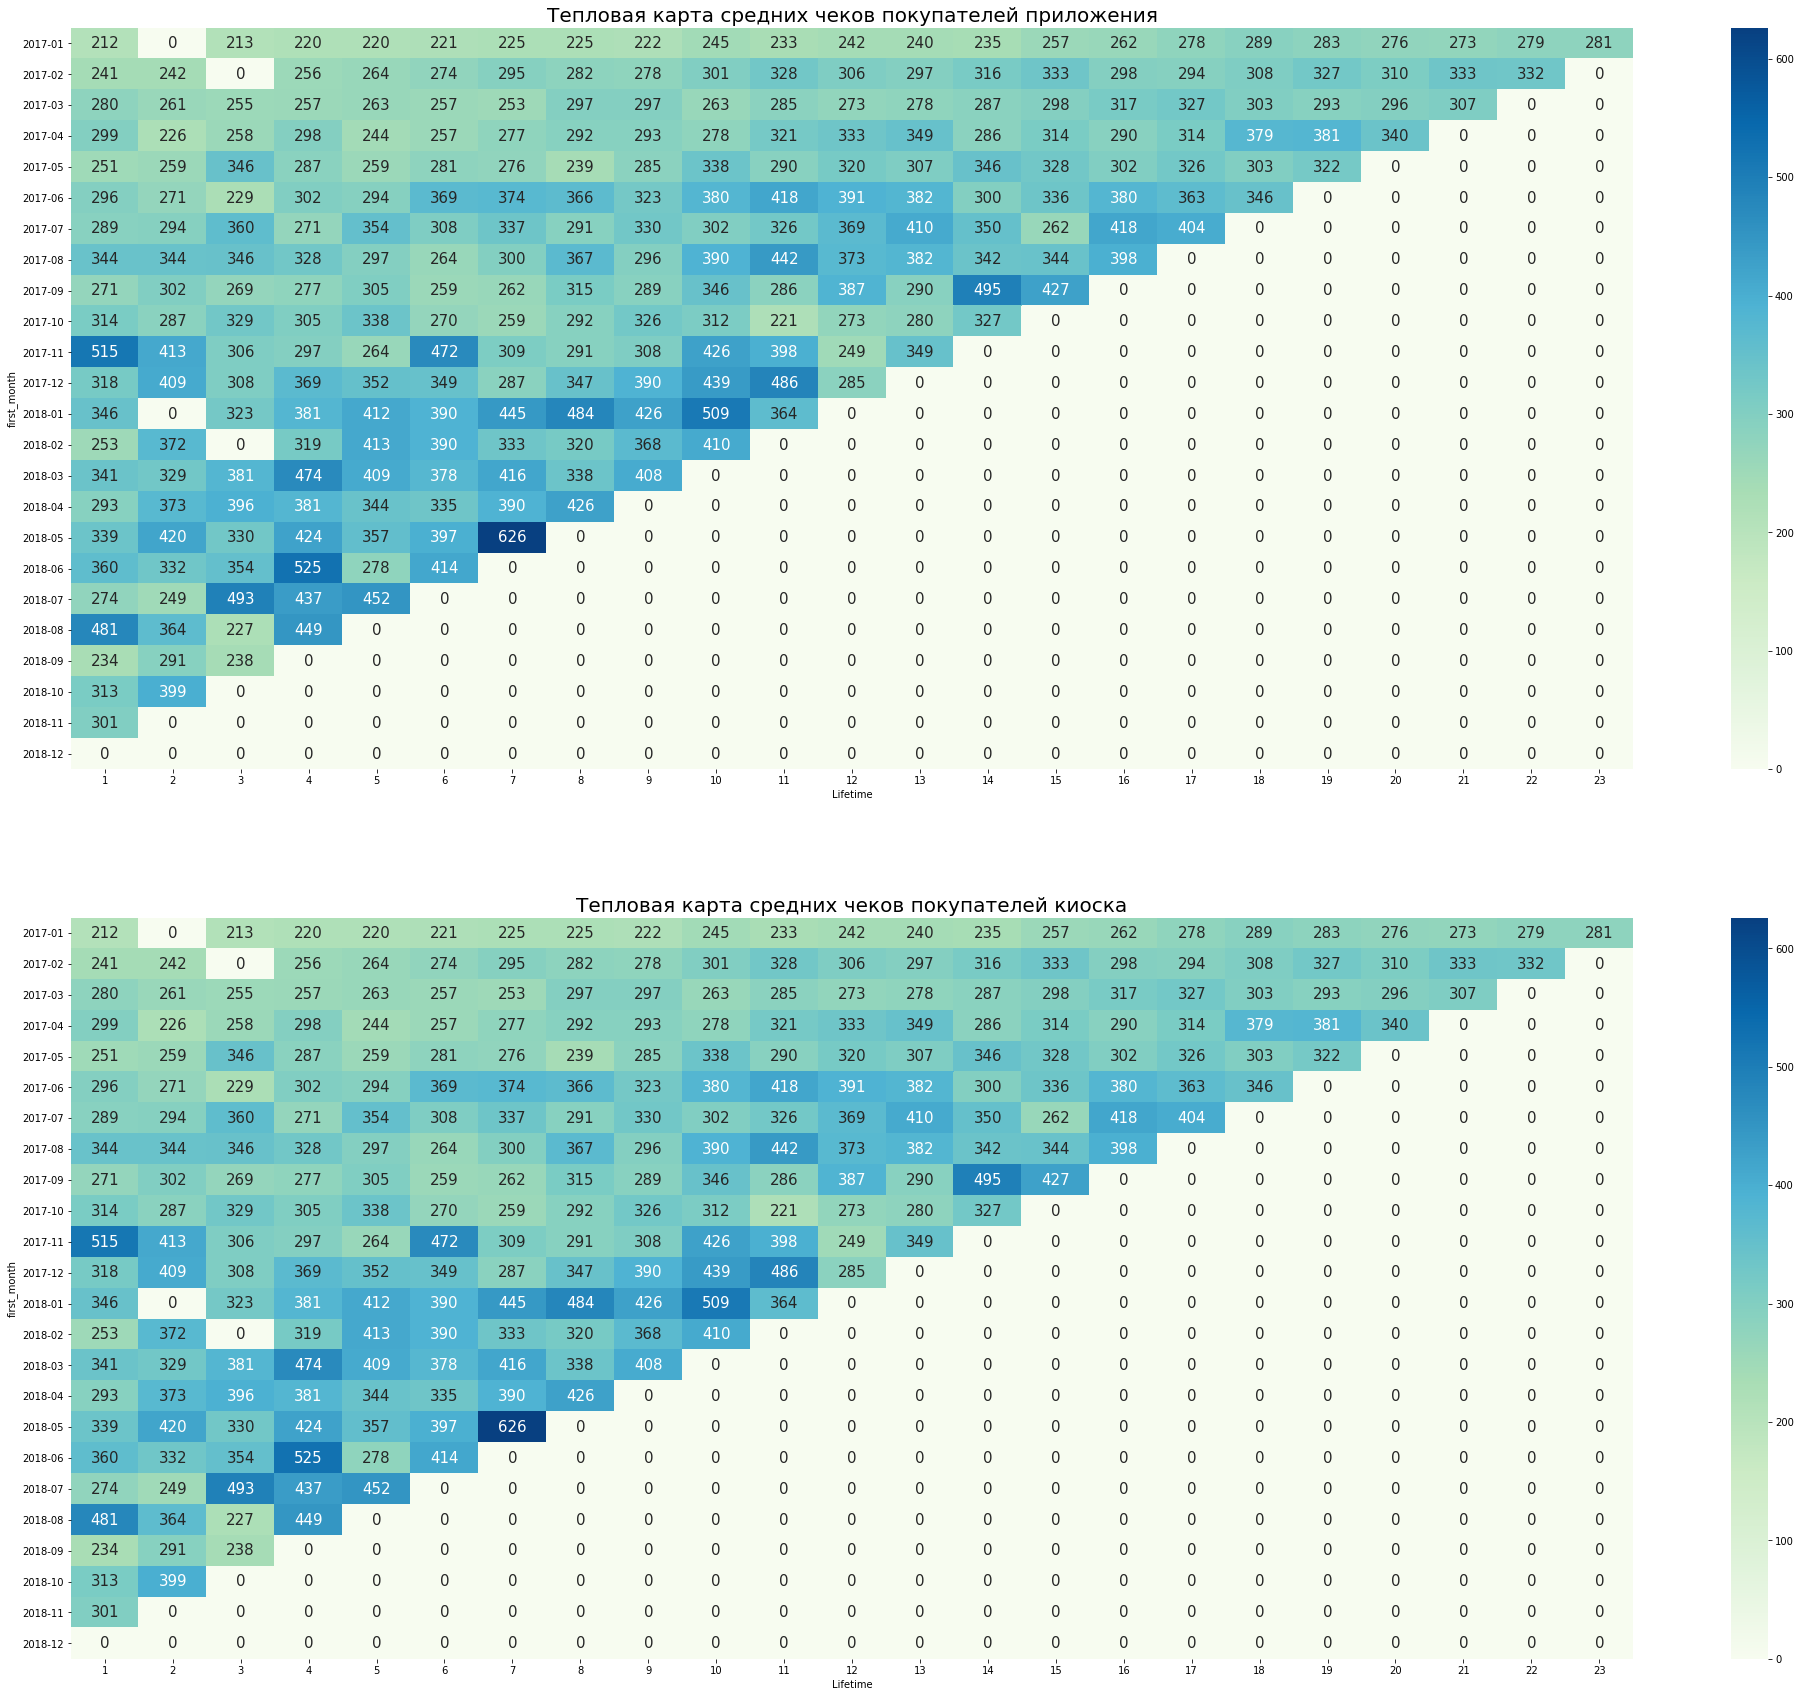

In [241]:
plt.figure(figsize=(35, 30))
plt.subplot(2, 1, 1)
sns.heatmap(retention_app_avg.drop(columns=[0]),annot=True, fmt='.0f', cmap='GnBu', annot_kws={"fontsize": 15})    
plt.title('Тепловая карта средних чеков покупателей приложения', fontsize=20)
plt.xlabel('Lifetime')


plt.subplot(2, 1, 2)
sns.heatmap(retention_app_avg.drop(columns=[0]),annot=True, fmt='.0f', cmap='GnBu', annot_kws={"fontsize": 15})    
plt.title('Тепловая карта средних чеков покупателей киоска', fontsize=20)
plt.xlabel('Lifetime')



plt.show()

Средний чек начинает расти в одинаковые месяцы в обоих источниках

Лояльные покупатели со временем начинают тратить больше, так же в целом новые покапатели начинают тратить больше

Это может быть связано с ростом ассортимента меню, промо или поднятием цен

**Общий вывод**

Покупатели мобильного приожения приносят больше прибыли предприятиям, они покупают чаще и больше,чем покупатели киосков.

Утренние часы отстают по продажам от дневных и ночных, для усиления продаж в это время можно ввести утренние промо: повышенный кешбек на позиции меню, утренние комбо или скидки

Так же в середнине недели продажи ниже, чем в начале или в конце, для усиления можно использовать геймификацию в приложении: например, каждый вторник запускать колесо фортуны, со сроком действия выигрыша 2-3 дня. Возможно в 2024 году такой проблемы нет, но если он есть, можно поймать хайп на игре с хомяком: <<https://dzen.ru/a/ZlvbfW48NFdLUIrv>>

Чтобы переводить покупателей в лояльных при заказе в киоске без карты лояльности, можно:
1. напоминать пробить карту лояльности за бонус дополнительный
2. показывать упущенные выгоды (кешбеки, или другие бонусы)